In [25]:
from pandas import DataFrame

inputs = [
        ({'level':'Senior','lang':'Java','tweets':'no','phd':'no'},   False),
        ({'level':'Senior','lang':'Java','tweets':'no','phd':'yes'},  False),
        ({'level':'Mid','lang':'Python','tweets':'no','phd':'no'},     True),
        ({'level':'Junior','lang':'Python','tweets':'no','phd':'no'},  True),
        ({'level':'Junior','lang':'R','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'R','tweets':'yes','phd':'yes'},    False),
        ({'level':'Mid','lang':'R','tweets':'yes','phd':'yes'},        True),
        ({'level':'Senior','lang':'Python','tweets':'no','phd':'no'}, False),
        ({'level':'Senior','lang':'R','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'Python','tweets':'yes','phd':'no'}, True),
        ({'level':'Senior','lang':'Python','tweets':'yes','phd':'yes'},True),
        ({'level':'Mid','lang':'Python','tweets':'no','phd':'yes'},    True),
        ({'level':'Mid','lang':'Java','tweets':'yes','phd':'no'},      True),
        ({'level':'Junior','lang':'Python','tweets':'no','phd':'yes'},False)
    ]

In [40]:
data = [(item[0]['phd'],item[0]['tweets'], item[0]['level'], item[0]['lang'], item[1]) for item in inputs]

feautures = ['phd', 'tweets', 'level', 'lang']
target = ['target']
columns = feautures + target

df = DataFrame(data, columns=columns)
df.head()

,phd,tweets,level,lang,target
0,no,no,Senior,Java,False
1,yes,no,Senior,Java,False
2,no,no,Mid,Python,True
3,no,no,Junior,Python,True
4,no,yes,Junior,R,True


In [27]:
from sklearn.preprocessing import LabelEncoder

In [31]:
from collections import defaultdict
d = defaultdict(LabelEncoder)
fit = df.apply(lambda x: d[x.name].fit_transform(x))
#df= df.apply(LabelEncoder().fit_transform)
# Using the dictionary to label future data
df_num = df.apply(lambda x: d[x.name].transform(x))

# Inverse the encoded
#df_num.apply(lambda x: d[x.name].inverse_transform(x))

In [35]:
df_num.head()

,phd,tweets,level,lang,target
0,0,0,2,0,0
1,1,0,2,0,0
2,0,0,1,1,1
3,0,0,0,1,1
4,0,1,0,2,1


In [41]:
X = df_num[feautures]
y = df_num[target]

In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X, y)

In [47]:
from sklearn.externals.six import StringIO
with open("inputs.dot", 'w') as f:
  f = export_graphviz(clf, out_file=f, feature_names=columns)

In [48]:
! apt-get install graphviz -y; dot -Tpng inputs.dot -o inputs.png

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


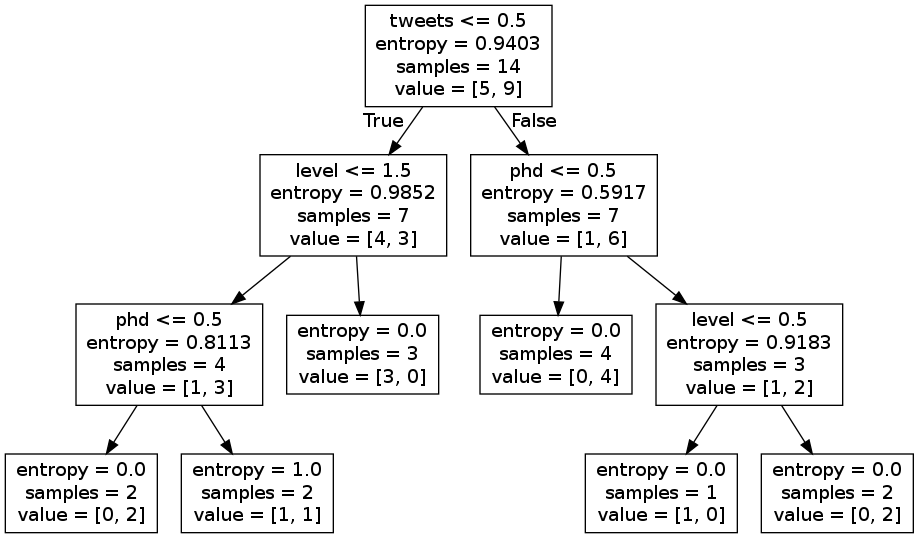

In [49]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("inputs.png")

In [51]:
prediction = clf.predict(X)

In [55]:
df_target_out = DataFrame(prediction, columns=['target'])

In [56]:
df_target_out.apply(lambda x: d[x.name].inverse_transform(x))

,target
0,False
1,False
2,True
3,True
4,True
5,False
6,True
7,False
8,True
9,True
